<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial1.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial1.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# Tutorial 1:  ClimateBench Dataset and How Machine Learning Can Help

**Week 2, Day 4, AI and Climate Change**

**Content creators:** Deepak Mewada, Grace Lindsay

**Content reviewers:** Mujeeb Abdulfatai, Nkongho Ayuketang Arreyndip, Jeffrey N. A. Aryee, Paul Heubel, Jenna Pearson, Abel Shibu

**Content editors:** Deepak Mewada, Grace Lindsay

**Production editors:** Paul Heubel, Konstantine Tsafatinos

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

Today, you will work on a total of 6 short tutorials.  In Tutorial 1, you delve into the fundamentals, including discussions on climate model emulators and the ClimateBench dataset. You gain insights into Earth System Models (ESMs) and Shared Socioeconomic Pathways (SSPs), alongside practical visualization techniques for ClimateBench features. Tutorial 2 expands on these foundations, exploring decision trees, hyperparameters, and random forest models. You learn to evaluate regression models, focusing on the coefficient of determination (R$^2$), and gain hands-on experience implementing models using `scikit-learn`. Tutorial 3 shifts focus to mitigating overfitting in machine learning models. Here, you learn the importance of model generalization and acquire practical skills for splitting data into training and test sets. In Tutorial 4, you refine your understanding of model robustness, with emphasis on within-distribution generalization and testing model performance on similar data. Tutorial 5 challenges you to test our models on various types of out-of-distribution data, while also exploring the role of climate model emulators in climate science research. Finally, Tutorial 6 concludes the series by discussing practical applications of AI and machine learning in addressing climate change-related challenges, and introducing available resources and tools in the field of climate change AI.

In this tutorial, you will
* Learn about the basics of data science and machine learning.
* Define “climate model emulators”.
* Introduce the ClimateBench dataset.
* Visualize features from this dataset.


# Setup

In [1]:
# for Google Colab users uncomment this install line
!pip install cartopy

# imports
import matplotlib.pyplot as plt     # For plotting graphs
import pandas as pd                 # For data manipulation
import xarray as xr                 # For multidimensional data manipulation
import seaborn as sns               # For advanced visualizations
import cartopy.crs as ccrs          # for geospatial visualizations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.6 MB/s eta 0:00:00


In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D4_T1"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Video 1: Machine Learning on ClimateBench data

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents

video_ids = [('Youtube', 'SFMcxzndsso'), ('Bilibili', 'BV1RPGDexEmu'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [5]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Machine_Learning_on_ClimateBench_data_Video")

In [6]:
# @title Tutorial slides

# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "4k3jd"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/4k3jd/


In [7]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Machine_Learning_on_ClimateBench_data_Slides")

# Section 1: ClimateBench Dataset and How Machine Learning Can Help

Section Objectives:
* Understand how machine learning can be helpful generally
* Understand the climate model data we will be working with
* Understand the concept of a climate model emulator
* Learn how to explore the dataset






## Section 1.1:  About the ClimateBench dataset

The ClimateBench dataset offers a comprehensive collection of hypothetical climate data derived from sophisticated computer simulations (specifically, the NorESM2 model, available via CIMP6). It includes information on key climate variables such as temperature, precipitation, and diurnal temperature range. These values are collected by running simulations that represent the different Shared Socioeconomic Pathways (SSPs). Each pathway is associated with a different projected emissions profile over time. This data thus provides insights into how these climate variables may change in the future due to different emission scenarios. By utilizing this dataset, researchers can develop predictive models to better understand and anticipate the impacts of climate change, ultimately aiding in the development of effective mitigation strategies. Specifically, this data set is well-formatted for training *machine learning models*, which is exactly what you will do here.

A brief overview of the ClimateBench dataset is provided below; for additional details, please refer to the full paper -

[ClimateBench v1.0: A Benchmark for Data-Driven Climate Projections](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)   

### Spatial Resolution:
The simulations are conducted on a grid with a spatial resolution of approximately 2°, allowing for analysis of regional climate patterns and phenomena.

### Variables:
The dataset includes four main variables defined for each point on the grid:
1. <font color='#1f77b4'>**Temperature (TAS)**</font>: Represents the annual mean surface air temperature.
2. <font color='#ff7f0e'>**Diurnal Temperature Range (DTR)**</font>: Reflects the difference between the maximum and minimum temperatures within a day averaged annually.
3. <font color='#2ca02c'>**Precipitation (PR)**</font>: Indicates the annual total precipitation.
4. <font color='#d62728'>**90th Percentile of Precipitation (PR90)**</font>: Captures extreme precipitation events by identifying the 90th percentile of daily precipitation values.   
  

### ScenarioMIP Simulations:
The dataset incorporates ScenarioMIP simulations, exploring various future emission pathways under different socio-economic scenarios. Each scenario is defined by a set of annual emissions values over future years. We will look at 5 different scenarios in total here.

### Emissions Inputs:
Emissions scenarios are defined according to the following four types of emissions:
- <font color='#9467bd'>Carbon dioxide (CO<sub>2</sub>)</font> concentrations.
- <font color='#8c564b'>Methane (CH<sub>4</sub>)</font> concentrations.
- <font color='#e377c2'>Sulfur dioxide (SO<sub>2</sub>)</font> emissions, a precursor to sulfate aerosols.
- <font color='#7f7f7f'>Black carbon (BC)</font> emissions.

Note: In the ClimateBench dataset, sulfur dioxide and black carbon emissions are provided as a spatial map over grid locations, but we will just look at global totals here.

### Model Specifications:
- Simulation Model: the NorESM2 model is run in its low atmosphere-medium ocean resolution (LM) configuration.
- Model Components: Fully coupled earth system including the atmosphere, land, ocean, ice, and biogeochemistry components.
- Ensemble Averaging: Target variables are averaged over three ensemble members to mitigate internal variability contributions.

By leveraging the ClimateBench dataset, researchers gain insights into climate dynamics, enabling the development and evaluation of predictive models crucial for understanding and addressing climate change challenges.

<p align='center'><img src='https://github.com/neuromatch/climate-course-content/blob/main/tutorials/W2D4_AIandClimateChange/images/W2D4_Tutorial1_climatebench_Scenario.png?raw=True' alt='W2D4_Tutorial1_climatebench_Scenario'/></p>

For simplicity's sake, we'll utilize a **condensed version of the ClimateBench dataset**. As mentioned above, we will be looking at only 5 scenarios ('SSPs', listed above as "experiments"), and all emissions will be given as global annual averages for the years 2015 to 2050. Furthermore, we will include climate variables for each spatial location (as defined by latitude and longitude for a restricted region) for the year 2015. The target for our model prediction will be temperature in the year 2050 for each spatial location.

## Section 1.2: Load the Dataset (Condensed Version)

We will use `pandas` to interact with the data, which is shared in the `.csv` format. First, let us load the environmental data into a pandas dataframe and print its contents.

In [8]:
#Load Dataset
url_Climatebench_train_val = "https://osf.io/y2pq7/download"
training_data = pd.read_csv(url_Climatebench_train_val)

## Section 1.3: Explore Data Structure

Next, we will quickly explore the size of the data, check for missing data, and understand column names

In [9]:
print(training_data.shape)

(3240, 152)


This tells us we have 3240 rows and 152 columns.

Let's look at what these rows and columns mean:

In [10]:
training_data

,scenario,lat,lon,tas_2015,pr_2015,pr90_2015,dtr_2015,tas_FINAL,CO2_2015,SO2_2015,...,CH4_2048,BC_2048,CO2_2049,SO2_2049,CH4_2049,BC_2049,CO2_2050,SO2_2050,CH4_2050,BC_2050
0,ssp126,-19.894737,0.0,0.547699,-4.770247e-07,-1.412226e-07,0.034963,0.848419,1536.072222,6.686393e-08,...,0.206332,1.434831e-09,2585.223981,1.603985e-08,0.203214,1.398414e-09,2604.946519,1.547451e-08,0.200096,1.361996e-09
1,ssp126,-19.894737,2.5,0.648376,-2.947038e-07,-4.729113e-07,0.039381,0.737915,1536.072222,6.686393e-08,...,0.206332,1.434831e-09,2585.223981,1.603985e-08,0.203214,1.398414e-09,2604.946519,1.547451e-08,0.200096,1.361996e-09
2,ssp126,-19.894737,5.0,0.696808,-2.691091e-07,-5.525026e-07,0.021043,0.588806,1536.072222,6.686393e-08,...,0.206332,1.434831e-09,2585.223981,1.603985e-08,0.203214,1.398414e-09,2604.946519,1.547451e-08,0.200096,1.361996e-09
3,ssp126,-19.894737,7.5,0.721252,-4.967706e-08,-5.830042e-07,0.020420,0.522766,1536.072222,6.686393e-08,...,0.206332,1.434831e-09,2585.223981,1.603985e-08,0.203214,1.398414e-09,2604.946519,1.547451e-08,0.200096,1.361996e-09
4,ssp126,-19.894737,10.0,0.898682,-3.642627e-07,-9.914260e-07,-0.033305,0.776642,1536.072222,6.686393e-08,...,0.206332,1.434831e-09,2585.223981,1.603985e-08,0.203214,1.398414e-09,2604.946519,1.547451e-08,0.200096,1.361996e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,ssp370-lowNTCF,63.473684,32.5,0.525085,1.653533e-06,4.044508e-06,0.107734,1.626139,1536.072222,6.686393e-08,...,0.530093,2.932431e-09,3231.101144,2.975203e-08,0.534263,2.840629e-09,3291.118087,2.854076e-08,0.538434,2.748826e-09
3236,ssp370-lowNTCF,63.473684,35.0,0.643158,1.000110e-06,3.569633e-06,0.020086,1.804036,1536.072222,6.686393e-08,...,0.530093,2.932431e-09,3231.101144,2.975203e-08,0.534263,2.840629e-09,3291.118087,2.854076e-08,0.538434,2.748826e-09
3237,ssp370-lowNTCF,63.473684,37.5,0.819377,8.274455e-07,3.599522e-06,-0.055249,1.925557,1536.072222,6.686393e-08,...,0.530093,2.932431e-09,3231.101144,2.975203e-08,0.534263,2.840629e-09,3291.118087,2.854076e-08,0.538434,2.748826e-09
3238,ssp370-lowNTCF,63.473684,40.0,0.795258,6.147420e-07,-4.846323e-07,0.078986,2.026601,1536.072222,6.686393e-08,...,0.530093,2.932431e-09,3231.101144,2.975203e-08,0.534263,2.840629e-09,3291.118087,2.854076e-08,0.538434,2.748826e-09


Each row represents a combination of spatial location and scenario. The scenario can be found in the 'scenario' column while the location is given in the 'lat' and 'lon' columns. Climate variables for 2015 are given in the following columns and tas_FINAL represents the temperature in 2050. After these columns, we get the annual global emissions values for each of the 4 emissions types included in ClimateBench, starting in 2015 and ending in 2050.

**Handle Missing Values (if necessary)**:

We cannot train a machine learning model if there are values missing anywhere in this dataset. Therefore, we will check for missing values using `training_data.isnull().sum()`, which sums the number of 'null' or missing values.
If missing values exist, we can consider imputation techniques (e.g., [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), [`interpolate`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)) based on the nature of the data and the specific column.

In [11]:
training_data.isnull().sum()

,0
scenario,0
lat,0
lon,0
tas_2015,0
pr_2015,0
...,...
BC_2049,0
CO2_2050,0
SO2_2050,0
CH4_2050,0


Here, there are no missing values as the sum of all [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) values is zero for all columns. So we are good to go!

## Section 1.4: Visualize the data
In this section, we'll utilize visualization techniques to explore the dataset, uncovering underlying patterns and distributions of the variables. Visualizations are instrumental in making informed decisions and conducting comprehensive data analysis.

**Spatial Distribution of Temperature and Precipitation:**  
Plotting the spatial distribution of temperature can reveal geographical patterns and hotspots. We will use the temperature at 2015, the starting point of our simulation.

In [12]:
# Create a xarray dataset from the pandas dataframe
# for convenient plotting with cartopy afterwards
ds = xr.Dataset({'tas_2015': ('points', training_data['tas_2015'])},
                coords={'lon': ('points', training_data['lon']),
                        'lat': ('points', training_data['lat'])}
               )
ds

<xarray.Dataset> Size: 78kB
Dimensions:   (points: 3240)
Coordinates:
    lon       (points) float64 26kB 0.0 2.5 5.0 7.5 10.0 ... 35.0 37.5 40.0 42.5
    lat       (points) float64 26kB -19.89 -19.89 -19.89 ... 63.47 63.47 63.47
Dimensions without coordinates: points
Data variables:
    tas_2015  (points) float64 26kB 0.5477 0.6484 0.6968 ... 0.7953 0.8895

Text(0.5, -0.03, 'The anomalies are calculated by subtracting the annual means of the pre-industrial scenario from \nthe annual means of the respective scenario.')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


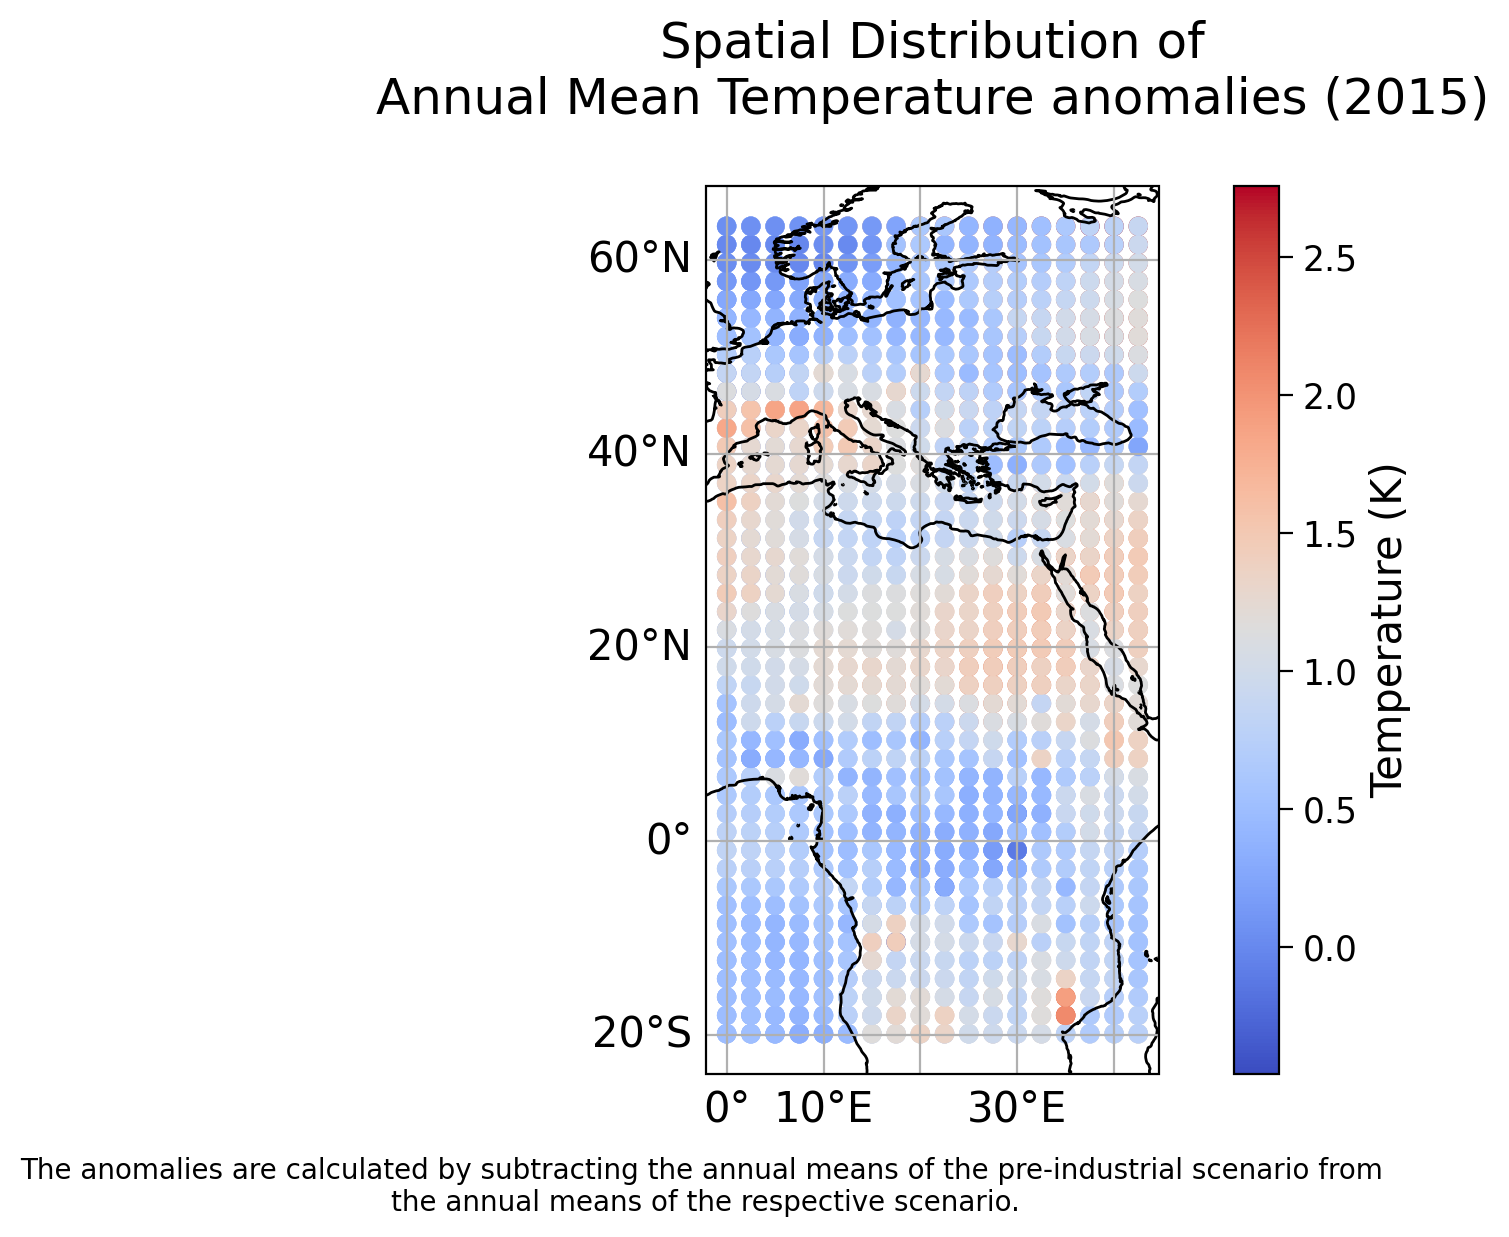

In [13]:
# create geoaxes
ax = plt.axes(projection=ccrs.PlateCarree())

# add coastlines
ax.coastlines()

# plot the data
p = ax.scatter(ds['lon'], ds['lat'], c=ds['tas_2015'], cmap='coolwarm', transform=ccrs.PlateCarree())

# add a colorbar
cbar = plt.colorbar(p, orientation='vertical')
cbar.set_label('Temperature (K)')

# add a grid and labels
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})

# add title
plt.title('Spatial Distribution of\nAnnual Mean Temperature anomalies (2015)\n')

# add a caption with adjusted y-coordinate to create space
caption_text = 'The anomalies are calculated by subtracting the annual means of the pre-industrial scenario from \nthe annual means of the respective scenario.'
plt.figtext(0.5, -0.03, caption_text, ha='center', fontsize=10)  # Adjusted y-coordinate to create space

We can see there are clear spatial variations in 2015 temperatures. Note the range of latitude and longitude values, this dataset does not cover the entire globe.

Now use the same plotting code to make a plot of the spatial distribution of total precipitation:

### Coding Exercise 1.4:  Plotting Spatial Distribution of Total Precipitation

In this exercise, you will complete the code to plot the spatial distribution of total precipitation. Use the provided plotting code as a template and replace the ellipses with appropriate values.

*Note that you have the necessary libraries already imported* (`xarray`, `matplotlib.pyplot`, `cartopy.crs` *and* `pandas`).

In [14]:
def plot_spatial_distribution(data, col_name, c_label):
    """
    Plot the spatial distribution of a variable of interest.

    Args:
        data (DataFrame): DataFrame containing latitude, longitude, and data of interest.
        col_name (str): Name of the column containing data of interest.
        c_label (str): Label to describe quantity and unit for the colorbar labeling.

    Returns:
        None
    """
    # create a xarray dataset from the pandas dataframe
    # for convenient plotting with cartopy afterwards
    ds = xr.Dataset({col_name: ('points', data[col_name])},
                    coords={'lon': ('points', data['lon']),
                            'lat': ('points', data['lat'])}
                   )

    # create geoaxes
    ax = plt.axes(projection=ccrs.PlateCarree())

    # add coastlines
    ax.coastlines()

    # plot the data with ax.scatter(..., ..., ..., cmap='coolwarm', transform=ccrs.PlateCarree())
    p = ...

    # add a colorbar
    cbar = plt.colorbar(p, orientation='vertical')
    cbar.set_label(c_label)

    # add a grid and labels
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"})

    # add title
    plt.title('Spatial Distribution of\n Annual Mean Anomalies\n')
    plt.show()

# test your function along precipitation data
_ = ...

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial1_Solution_2cd3202b.py)

*Example output:*

<img alt='Solution hint' align='left' width=445.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/static/W2D4_Tutorial1_Solution_2cd3202b_0.png>



**Time Series Plot of Emissions Scenarios:**


We will plot the time series of each of the four emissions scenarios in this dataset (we will get to the fifth one later). Each row in the dataset with the same 'scenario' label has the same emissions values over time. So we will only use the data from the first spatial location for each scenario.

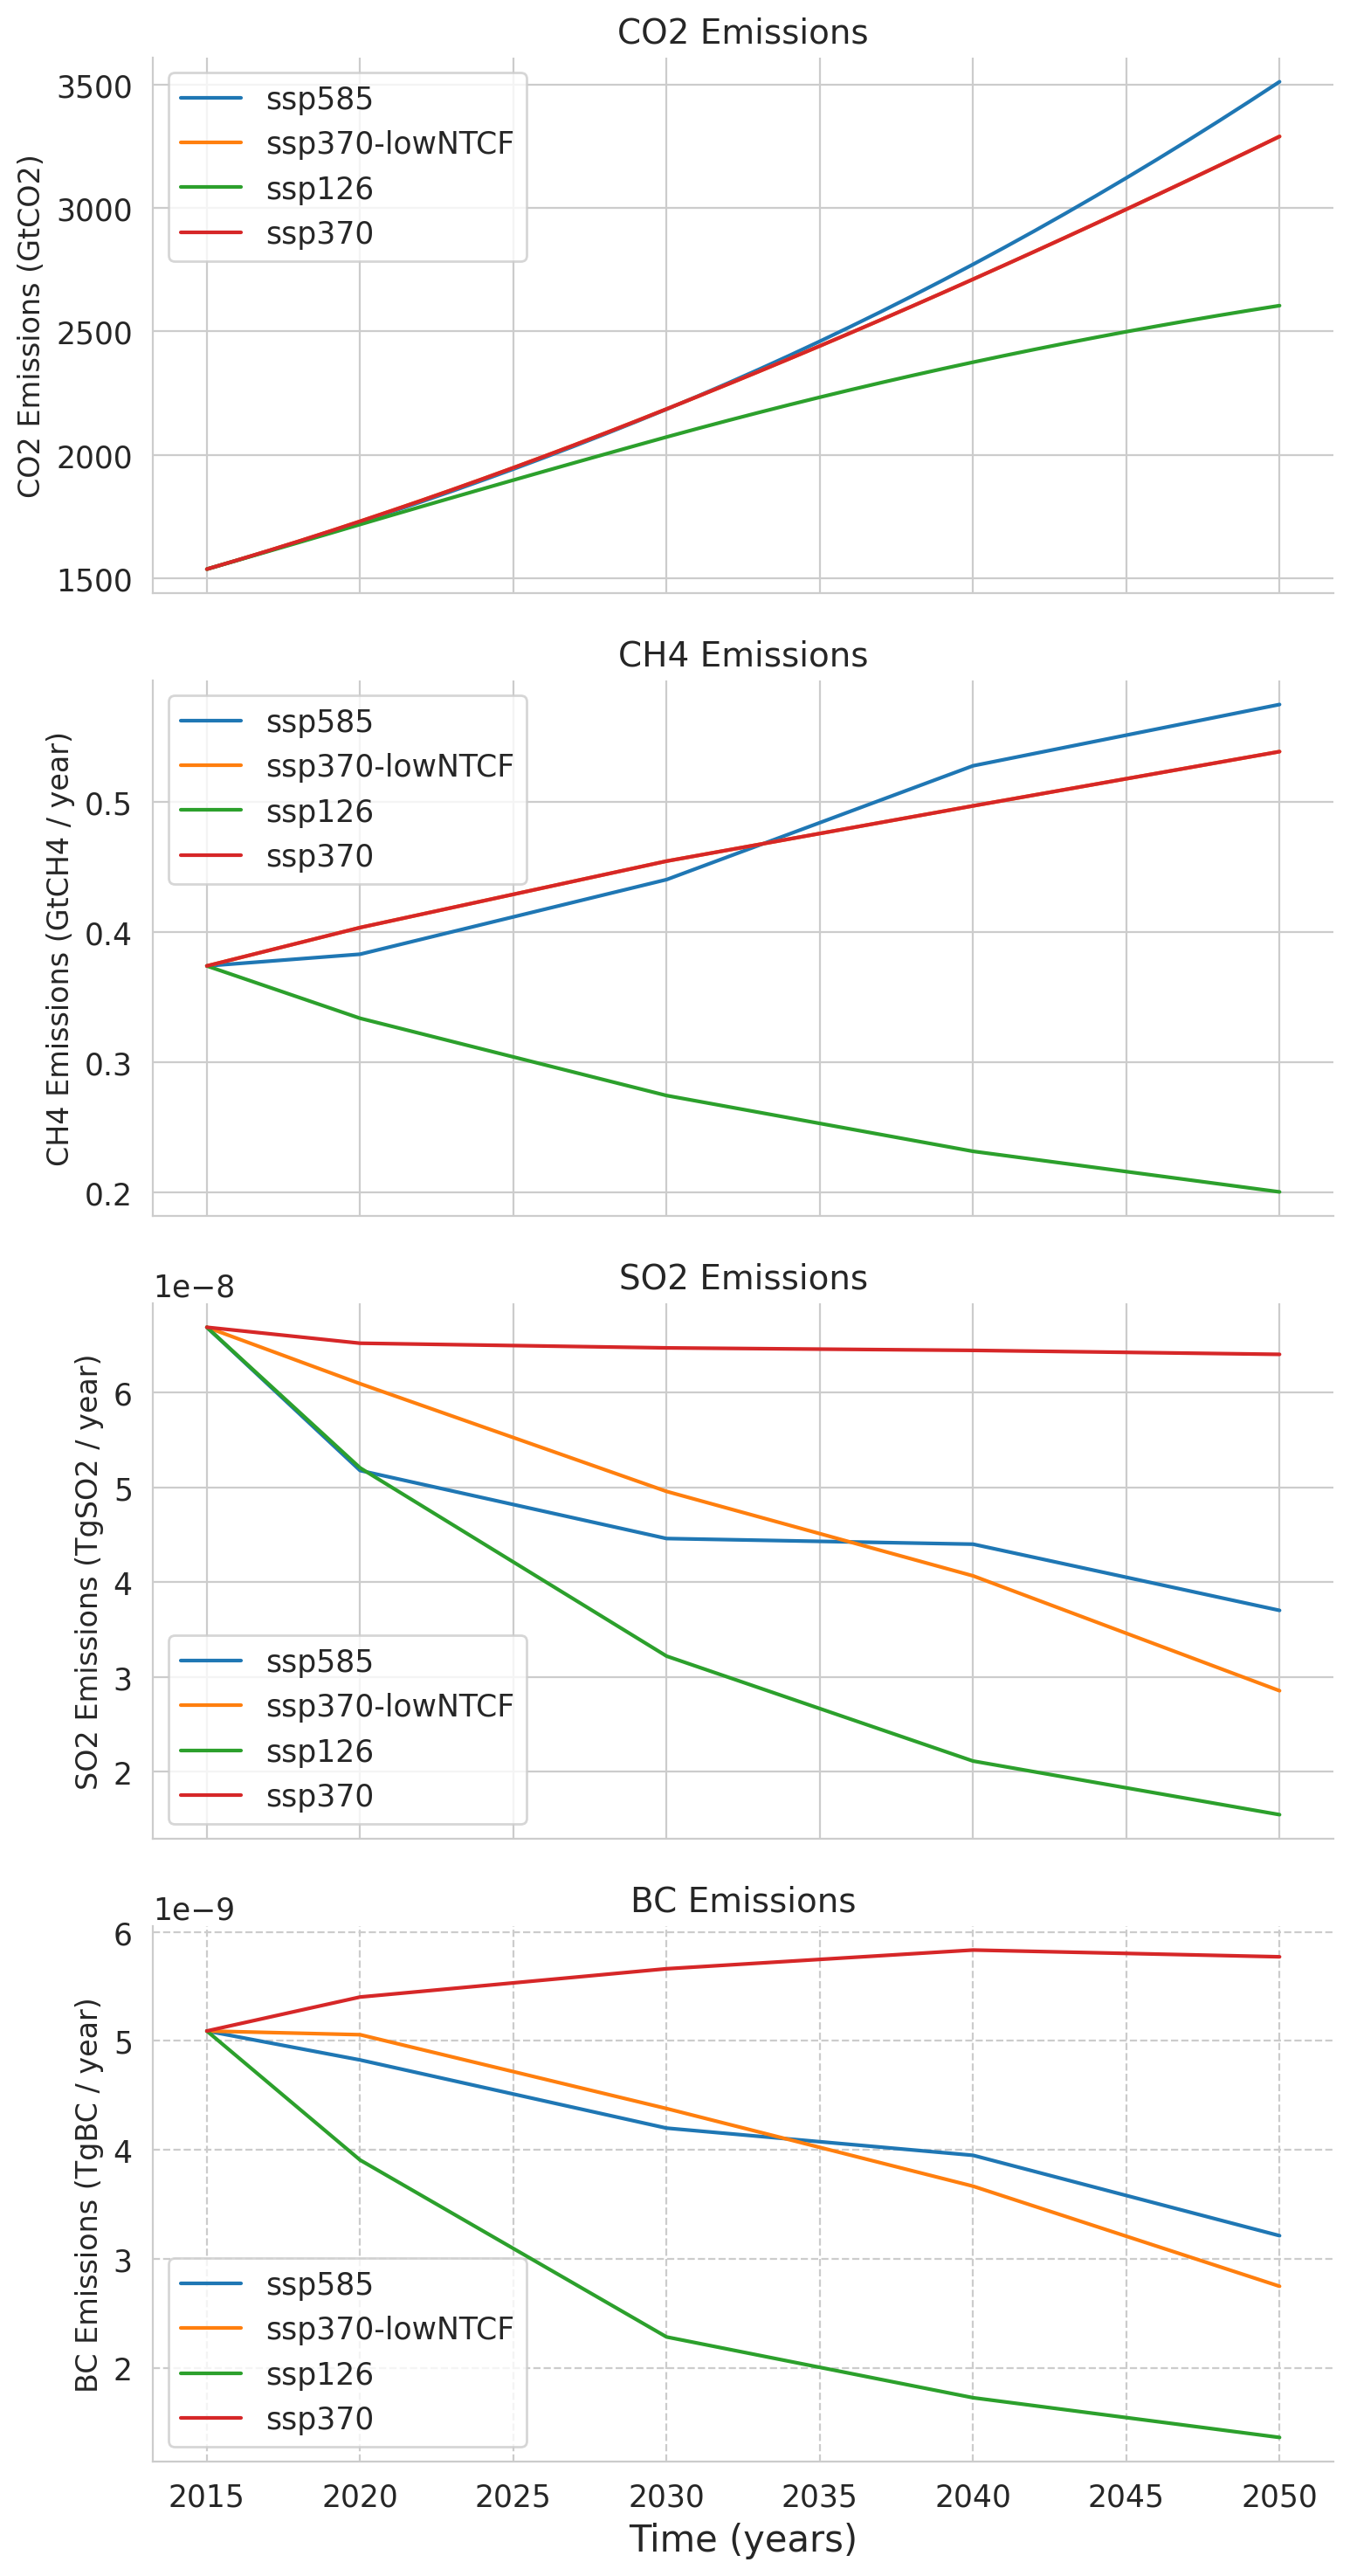

In [15]:
# @title Run this cell to plot the Time Series Plot of Emissions Scenarios:
# Don't worry about understanding this code! It's to set up the plot.

# Set Seaborn style
sns.set_style("whitegrid")

# Extract emissions data for each scenario
CO2_data = training_data.filter(regex='CO2_\d+')
SO2_data = training_data.filter(regex='SO2_\d+')
CH4_data = training_data.filter(regex='CH4_\d+')
BC_data = training_data.filter(regex='BC_\d+')

# Define the four scenarios
scenarios = ['ssp585',  'ssp370-lowNTCF','ssp126', 'ssp370',]

# Create subplots for each emission gas
fig, axs = plt.subplots(4, 1, figsize=(8, 15), sharex=True)

# Define units for each emission
units = {'CO2': 'GtCO2', 'CH4': 'GtCH4 / year', 'SO2': 'TgSO2 / year', 'BC': 'TgBC / year'}

# Plot emissions data for each emission gas with enhanced styling
for i, (data, emission) in enumerate(zip([CO2_data,  CH4_data, SO2_data,BC_data], ['CO2',  'CH4', 'SO2','BC'])):
    # Plot each scenario for the current emission gas
    for scenario in scenarios:
        scenario_data = data[training_data['scenario'] == scenario]
        axs[i].plot(range(2015, 2051), scenario_data.mean(axis=0), label=scenario)

    # Set ylabel and title for the current emission gas
    axs[i].set_ylabel(f'{emission} Emissions ({units[emission]})', fontsize=12)
    axs[i].set_title(f'{emission} Emissions', fontsize=14)
    axs[i].legend()

# Set common xlabel
plt.xlabel('Time (years)')

# Adjust layout
plt.tight_layout()

# Show legends
plt.legend()

# Remove spines from all subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Customize ticks
plt.xticks()
plt.yticks()

# Show the plot
plt.grid(True, linestyle='--')
plt.show()

This last plot displays the global mean emissions contained in the ClimateBench dataset over the years 2015 to 2050 for four atmospheric constituents that are important for defining the forcing (cumulative anthropogenic carbon dioxide CO$_2$, methane CH$_4$, sulfur dioxide SO$_2$, black carbon BC). Each line represents a different emission scenario, which shows us trends and variations in emissions over time. The 'ssp370-lowNTCF' refers to a variation of the ssp370 scenario which includes lower emissions of near-term climate forcers (NTCFs) such as aerosol (but not methane).
These emission scenarios are used in the following tutorials as features/predictors for our prediction of the temperature in 2050.

All time series are derived from NorESM2 ScenarioMIP simulations available. Please read the paper of [Watson-Parris et al. (2022)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954) for a more detailed explanation of the ClimateBench dataset.

# Summary

In this tutorial, you acquainted yourself with the ClimateBench dataset and explored how machine learning contributes to climate analysis. We defined the versatility of machine learning and its role in predicting climate variables. By delving into the ClimateBench dataset, we highlight its accessibility in providing climate model data. We emphasize the importance of data visualization and engage in practical exercises to explore the dataset.


# Resources

* [ClimateBench v1.0: A Benchmark for Data-Driven Climate Projections](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)